# ***Submission 1: Prediksi Harga Crypto Solana***

***Nama: Bintang Akalla Junjunan***

***DBS Coding Camp 2024: Expert Class***

## ***Domain Project***

Cryptocurrency telah menjadi salah satu instrumen investasi yang populer dalam beberapa tahun terakhir. Salah satu cryptocurrency yang menunjukkan pertumbuhan signifikan adalah Solana (SOL). Solana dikenal dengan kecepatan transaksi yang tinggi dan biaya yang rendah, membuatnya menarik bagi pengembang dan investor. Namun, seperti kebanyakan cryptocurrency, harga Solana sangat volatil, sehingga sulit bagi investor untuk memprediksi pergerakan harganya.

Volatilitas harga Solana disebabkan oleh berbagai faktor, termasuk sentimen pasar, perkembangan teknologi, regulasi, dan aktivitas perdagangan. Untuk meminimalkan risiko dan memaksimalkan keuntungan, investor memerlukan alat prediksi yang andal. Machine learning dan deep learning menawarkan pendekatan yang potensial dalam memodelkan dan memprediksi harga aset finansial dengan menganalisis data historis dan mengenali pola yang kompleks.

Menurut penelitian oleh Zhang et al. (2020), metode deep learning seperti Long Short-Term Memory (LSTM) telah menunjukkan performa yang baik dalam memprediksi data time series finansial. Hal ini menjadikan LSTM sebagai kandidat yang menjanjikan untuk prediksi harga cryptocurrency seperti Solana.

Proyek ini bertujuan untuk mengembangkan model prediksi harga harian Solana menggunakan pendekatan machine learning dan deep learning. Dengan menganalisis data historis dan mengenali pola kompleks, diharapkan model ini dapat membantu investor dalam membuat keputusan investasi yang lebih baik, meminimalkan risiko, dan memaksimalkan keuntungan.

Referensi:

* Zhang, Y., Li, P., Wang, S., & Shen, D. (2020). Financial time series forecasting with deep learning: A systematic literature review. IEEE Access, 8, 181447-181468.


## ***Business Understanding***

Dalam proyek ini, tujuan utama adalah menerapkan metode machine learning untuk memprediksi harga penutupan harian Solana, sehingga dapat membantu investor dalam pengambilan keputusan yang lebih baik.

***Problem Statements***

Dalam konteks ini, kami mengidentifikasi beberapa pertanyaan kunci yang perlu dijawab untuk mencapai tujuan proyek:

* Bagaimana membangun model machine learning yang dapat memprediksi harga harian Solana?

* Algoritma machine learning apa yang paling efektif untuk memprediksi harga Solana berdasarkan data historis?

* Seberapa akurat model prediktif dalam memprediksi harga Solana dibandingkan dengan model baseline?

***Goals***

Berdasarkan problem statements di atas, tujuan utama proyek ini adalah sebagai berikut:

* Membangun model prediktif yang mampu memprediksi harga harian Solana.

* Mengidentifikasi algoritma machine learning yang paling efektif untuk prediksi harga Solana.

* Mengevaluasi model menggunakan MAE dan RMSE

***Solution Statements***

untuk mencapai tujuan tersebut, kami merumuskan beberapa solusi berikut:

* Menggunakan algoritma Long Short-Term Memory (LSTM) untuk memodelkan data harga historis Solana. LSTM dipilih karena kemampuannya dalam menangani data time series dan mengenali pola jangka panjang.

* Menggunakan Regresi Linear sebagai model baseline untuk membandingkan efektivitas model LSTM.

* Mengukur performa model menggunakan metrik evaluasi seperti Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE), yang sesuai untuk mengukur kesalahan prediksi dalam konteks data kontinu seperti harga.



## ***Data Understanding***

Data yang digunakan dalam submission ini adalah data historis harga Solana (SOL) yang diperoleh dari [investing.com](https://www.investing.com/crypto/solana/historical-data). Data mencakup periode dari 13 Juli 20240 hingga 5 November 2024

Informasi Dataset:
* Jumlah data lebih dari 500 sampel
* Beberapa fitur dengan format yang masih perlu dibersihkan

Dataset terdiri dari fitur-fitur berikut:
* Date : Tanggal pencatatan
* Price : Harga pada hari tersebut
* Open : Harga pembukaan pada hari tersebut
* High : Harga tertinggi pada hari tersebut
* Low : Harga terendah pada hari tersebut
* Volume : Volume perdagangan pada hari tersebut

## ***Import Library***

Import library-library yang dibutuhkan

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Modeling
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')



## ***Load Data***

Setelah melakukan import library, kita baca file CSV yang berisikan data historis harga harian Solana dan menampilkan lima data teratas

In [2]:
df = pd.read_csv(r'E:\IT\Machine_Learning\dataset\soldaily.csv')
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,11/05/2024,163.550,157.958,164.009,156.956,4.12M,3.54%
1,11/04/2024,157.953,162.490,164.959,155.188,4.02M,-2.79%
2,11/03/2024,162.483,166.082,166.544,158.004,3.80M,-2.17%
3,11/02/2024,166.082,166.149,168.560,162.228,2.29M,-0.05%
4,11/01/2024,166.165,168.763,173.945,163.796,4.54M,-1.53%


## ***Exploratory Data Analysis***

Pada langkah ini, kita melakukan analisis ekplorasi data untuk memahami struktur, pola, dan anomali dalam dataset

Dari `df.info()` menunjukkan informasi umum dari dataset, dimana beberapa kolom ada yang bertipe object dan float64, serta menunjukkan jumlah baris dalam kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1570 non-null   object 
 1   Price     1570 non-null   float64
 2   Open      1570 non-null   float64
 3   High      1570 non-null   float64
 4   Low       1570 non-null   float64
 5   Vol.      1172 non-null   object 
 6   Change %  1570 non-null   object 
dtypes: float64(4), object(3)
memory usage: 86.0+ KB


### ***Checking Missing Value***

Setelah melihat informasi umum di atas, dapat dilihat bahwa kolom Vol. itu memiliki jumlah data 1172, yang  dimana ini berbeda dari kolom-kolom lainnya, oleh karena itu kita akan melakukan cek apakah terdapat missing value atau tidak. Hasil dari pengecekan menunjukkan bahwa kolom Vol. itu memiliki 398 missing value, oleh karena itu ini akan di proses lebih lanjut lagi 

In [4]:
# Check for missing values
df.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        398
Change %      0
dtype: int64

Selanjutnya kita melakukan konversi kolom Vol. dan Change% ke dalam bentuk numerik, hal ini dilakukan disini karena pada tahap-tahap selanjutnya mengharuskan dua kolom ini berbentuk numerik. Kolom Vol. dikonversi menjadi string terlebih dahulu agar dapat mengubah 'M' dan 'K' dengan 'e6' dan 'e3' untuk notasi ilmiah, setelah ini menghapus koma pada kolom Vol.(jika ada). Kolom Vol. dikonversi menjadi nilai numerik(float). Kolom 'Change%' sama seperti kolom 'Vol.' dimana akan dikonversi ke string terlebih dahulu untuk menghilangkan karakter '%' sebelum dikonversi ke dalam bentuk numerik.

In [5]:
# Mengonversi kolom 'Vol.' menjadi string
df['Vol.'] = df['Vol.'].astype(str)

# Mengganti 'M' dengan 'e6' dan 'K' dengan 'e3' untuk notasi ilmiah
df['Vol.'] = df['Vol.'].str.replace('M', 'e6')
df['Vol.'] = df['Vol.'].str.replace('K', 'e3')

# Menghapus koma jika ada
df['Vol.'] = df['Vol.'].str.replace(',', '')

# Mengonversi string menjadi nilai numerik (float), mengubah error menjadi NaN
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')

# Membersihkan kolom 'Change %'
df['Change %'] = df['Change %'].str.replace('%', '')
df['Change %'] = pd.to_numeric(df['Change %'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1570 non-null   object 
 1   Price     1570 non-null   float64
 2   Open      1570 non-null   float64
 3   High      1570 non-null   float64
 4   Low       1570 non-null   float64
 5   Vol.      1172 non-null   float64
 6   Change %  1570 non-null   float64
dtypes: float64(6), object(1)
memory usage: 86.0+ KB


Disini kita melakukan visualisasi untuk distribusi volume perdagangan Solana serta menambahkan informasi statistik deskriptif, disini dapat diketahui bahwa volume paling besar dari perdagangan Solana sebensar 3.977200e+08 dan volume pergadangan Solana paling kecil adalah 8.500000e+04. Frekuensi volume perdagangan Solana paling banyak berada di kisaran 4840000 yang ditunjukkan pada keterangan pada hasil visualisasinya.


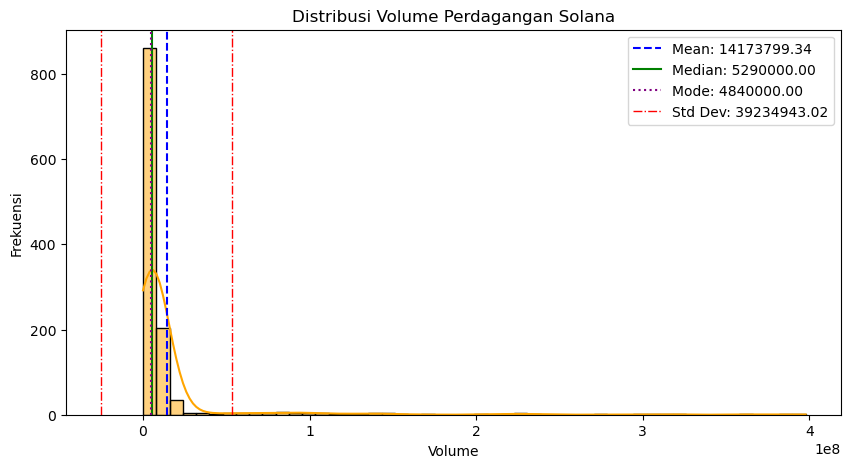

Statistik deskriptif untuk 'Vol.':
count    1.172000e+03
mean     1.417380e+07
std      3.923494e+07
min      8.500000e+04
25%      3.537500e+06
50%      5.290000e+06
75%      8.462500e+06
max      3.977200e+08
Name: Vol., dtype: float64
Mode: 4840000.0


In [6]:
# Menghitung statistik deskriptif untuk 'Vol.'
mean_vol = df['Vol.'].mean()
median_vol = df['Vol.'].median()
std_vol = df['Vol.'].std()
mode_vol = df['Vol.'].mode()[0] 

# Membuat histogram dengan garis distribusi KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['Vol.'], bins=50, kde=True, color='orange')
plt.title('Distribusi Volume Perdagangan Solana')
plt.xlabel('Volume')
plt.ylabel('Frekuensi')

# Menambahkan garis vertikal untuk rata-rata, median, dan modus
plt.axvline(mean_vol, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_vol:.2f}')
plt.axvline(median_vol, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_vol:.2f}')
plt.axvline(mode_vol, color='purple', linestyle=':', linewidth=1.5, label=f'Mode: {mode_vol:.2f}')
plt.axvline(mean_vol + std_vol, color='red', linestyle='-.', linewidth=1, label=f'Std Dev: {std_vol:.2f}')
plt.axvline(mean_vol - std_vol, color='red', linestyle='-.', linewidth=1)

plt.legend()
plt.show()

# Menampilkan statistik deskriptif 
print("Statistik deskriptif untuk 'Vol.':")
print(df['Vol.'].describe())
print(f"Mode: {mode_vol}")


### ***Checking Outliers***

Pada tahap ini kita akan melakukan pengecekan outliers menggunakan boxplot dan menggunakan perhitungan, dari hasil visualisasi ditunjukkan bahwa pada data numerik itu tidak ada outliers, hanya saja distribusinya yang tidak seimbang.

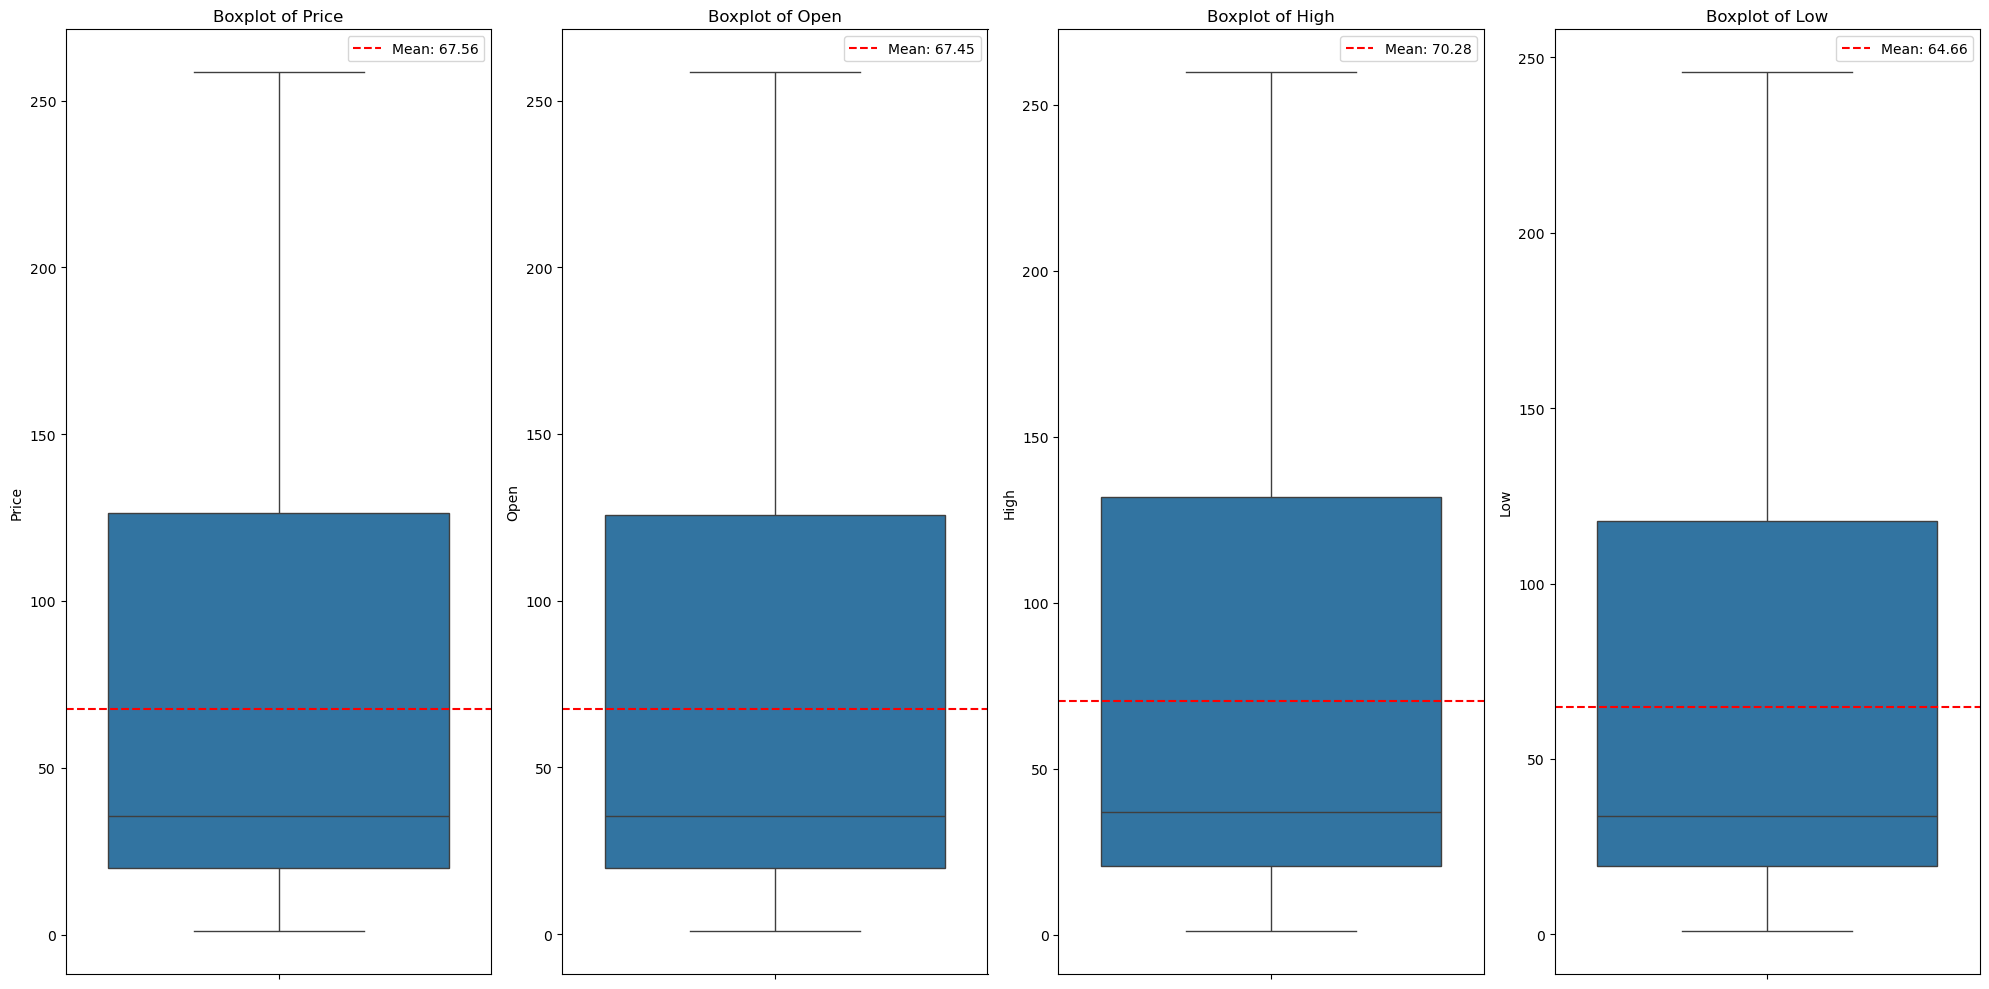

In [7]:
numeric_cols = ['Price', 'Open', 'High', 'Low']

plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 4, i+1)
    
    sns.boxplot(y=df[col], showfliers=True)
    
    mean_value = df[col].mean()
    plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.title(f'Boxplot of {col}')
    plt.legend()
    
plt.tight_layout()
plt.show()


Untuk memastikan lebih lanjut pengecekan outlier digunakan perhitungan seperti berikut, dan hasilnya menunjukkan data numerik ini tidak ada outliers.

In [8]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {col}:\n", outliers[col])


Outliers in Price:
 Series([], Name: Price, dtype: float64)
Outliers in Open:
 Series([], Name: Open, dtype: float64)
Outliers in High:
 Series([], Name: High, dtype: float64)
Outliers in Low:
 Series([], Name: Low, dtype: float64)


### ***Univariate Analysis***

Langkah pertama dalam memahami data harga Solana adalah dengan melihat distribusinya, histogram ini memberikan gambaran yang jelas tentang seberapa sering harga-harga tertentu muncul dalam dataset yang kita miliki.

Dari histogram, kita dapat melihat bahwa harga Solana cenderung terkonsentrasi pada lebih lebih rendah yaitu dengan nilai modus 1.79, dengan beberapa puncak di sepanjang spektrum harga.Frekuensi yang tinggi di harga rendah menunjukkan bahwa harga ini sering muncul dalam riwayat data Solana. Solana pernah menyentuh harga 258.477.

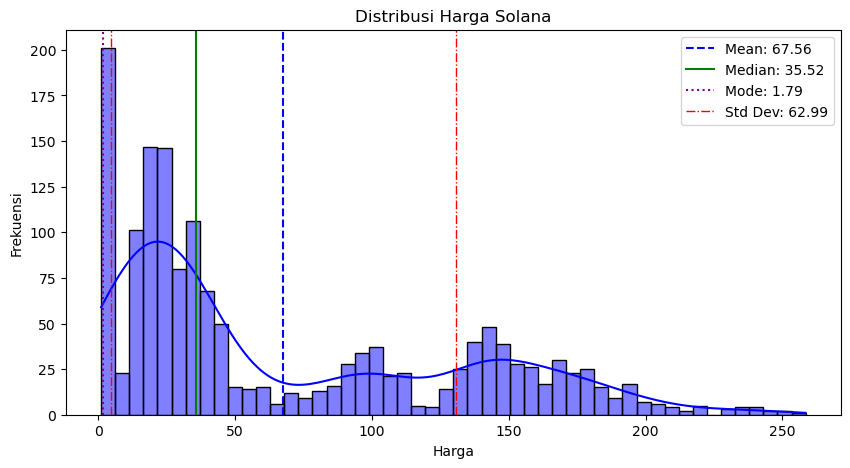

Statistik deskriptif untuk 'Price':
count    1570.000000
mean       67.556690
std        62.992891
min         1.004000
25%        20.007000
50%        35.518000
75%       126.452000
max       258.477000
Name: Price, dtype: float64
Mode: 1.787


In [9]:
# Menghitung statistik deskriptif untuk 'Price'
mean_price = df['Price'].mean()
median_price = df['Price'].median()
std_price = df['Price'].std()
mode_price = df['Price'].mode()[0] 

# Membuat histogram dengan garis distribusi KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Distribusi Harga Solana')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

# Menambahkan garis vertikal untuk rata-rata, median, dan modus
plt.axvline(mean_price, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_price:.2f}')
plt.axvline(mode_price, color='purple', linestyle=':', linewidth=1.5, label=f'Mode: {mode_price:.2f}')
plt.axvline(mean_price + std_price, color='red', linestyle='-.', linewidth=1, label=f'Std Dev: {std_price:.2f}')
plt.axvline(mean_price - std_price, color='red', linestyle='-.', linewidth=1)

plt.legend()
plt.show()

print("Statistik deskriptif untuk 'Price':")
print(df['Price'].describe())
print(f"Mode: {mode_price}")


Selanjutnya kita akan melihat visualisasi dari distribusi persentase perubahan harga harian Solana. Histogram ini memberikan wawasan tentang volatilitas harga harian Solana dari hari ke hari.

Distribusi perubahan harga harian Solana terlihat simetris dan cenderung membentuk distribusi normal, dengan puncak di -3.13 persen yang ditunjukkan dari perhitungan dibawah gambar visualisasi. Ini menunjukkan bahwa sebagain besar perubahan harga harian berkisar di sekitar nilai stabil. Solana pernah mengalami kenaikan yang cukup signifikan dalam sehari yaitu sebesar 64.83000. Ekor yang lebih panjang di sisi negatif dan positif menunjukkan adanya hari-hari tertentu yang mengalam perubahan harga yang lebih ekstrem.

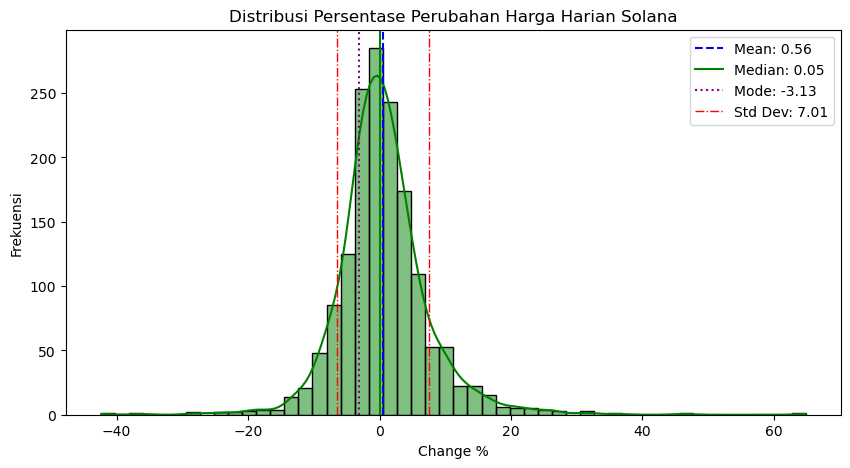

Statistik deskriptif untuk 'Change %':
count    1570.000000
mean        0.564102
std         7.010851
min       -42.350000
25%        -3.120000
50%         0.050000
75%         3.540000
max        64.830000
Name: Change %, dtype: float64
Mode: -3.13


In [10]:
# Menghitung statistik deskriptif untuk 'Change %'
mean_change = df['Change %'].mean()
median_change = df['Change %'].median()
std_change = df['Change %'].std()
mode_change = df['Change %'].mode()[0] 

# Membuat histogram dengan garis distribusi KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['Change %'], bins=50, kde=True, color='green')
plt.title('Distribusi Persentase Perubahan Harga Harian Solana')
plt.xlabel('Change %')
plt.ylabel('Frekuensi')

# Menambahkan garis vertikal untuk rata-rata, median, dan modus
plt.axvline(mean_change, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_change:.2f}')
plt.axvline(median_change, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_change:.2f}')
plt.axvline(mode_change, color='purple', linestyle=':', linewidth=1.5, label=f'Mode: {mode_change:.2f}')
plt.axvline(mean_change + std_change, color='red', linestyle='-.', linewidth=1, label=f'Std Dev: {std_change:.2f}')
plt.axvline(mean_change - std_change, color='red', linestyle='-.', linewidth=1)

plt.legend()
plt.show()

print("Statistik deskriptif untuk 'Change %':")
print(df['Change %'].describe())
print(f"Mode: {mode_change}")


### ***Multivariate Analysis***

Pada tahap ini kita menggunakan visualisasi heatmap untuk mempelajari hubungan antar variabel utama seperti `Price`, `Open`, `High`, `Low`, `Vol.`, dan `Change %.`, ini memberikan gambaran tentang seberapa kuat hubungan antaraa dua variabel dalam dataset

terlihat bahwa variabel-variabel harga memiliki korelasi yang hampir sempura, mendekati 1. Hal ini umum dalam data harga keuangank karena harga pembukaan, tertinggi, terendah, dan penutup biasanya bergerak bersamaan dalam periode waktu yang sama

Korelasi antara `Vol.` dan variabel-variabel harga lainnya sangat rendah, menunjukkan bahwa volume perdagangan tidak memiliki hubungan linear yang kuat dengan perubahan harga harian. Variabel `Change%` juga memiliki korelasi terbalik, ini terjadi karena volatilitas di harga yang rendah dan lebih stabil di harga yang tinggi.

In [11]:
import plotly.express as px

fig = px.imshow(df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].corr(),
                text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')

fig.update_layout(title='Correlation Heatmap', autosize=False, width=700, height=500)
fig.show()


Selanjutnya ktia melakukan visualisasi menggunakan Pairplot yang memberikan pandangan lebih lanjut dengan menunjukkan distribusi setiap variabel di sepanjang diagonal dan hubungan antar variabel dalam bentuk scatter plot di luar diagonal.

Pada scatter plot antar variabel harga terlihat bahwa hubugnan di antara variabel-variabel ini sangat linear dan berkorelasi kuat. Misalkan jika `Open` naik, variabel harga lainnya juga cenderung naik. Hal ini umum dalam data keuangan dimana harga pembuka, tertinggi, terendah, dan penutupan biasanya berfluktuasi bersama-sama dalam satu hari.

Distribusi `Change %` terlihat mendekati distribusi normal dengan puncak di sekitar nol. Ini berarti perubahan harga harian sebagian besar berada di sekitar titik nol, yang menunjukkan volatilitas harian yang relatif rendah dengan beberapa outlier di kedua sisi (positif dan negatif). Sedangkan distribusi `Vol.` menunjukkan beberapa puncak, yang mungkin menunjukkan lonjakan volume pada waktu-waktu tertentu.

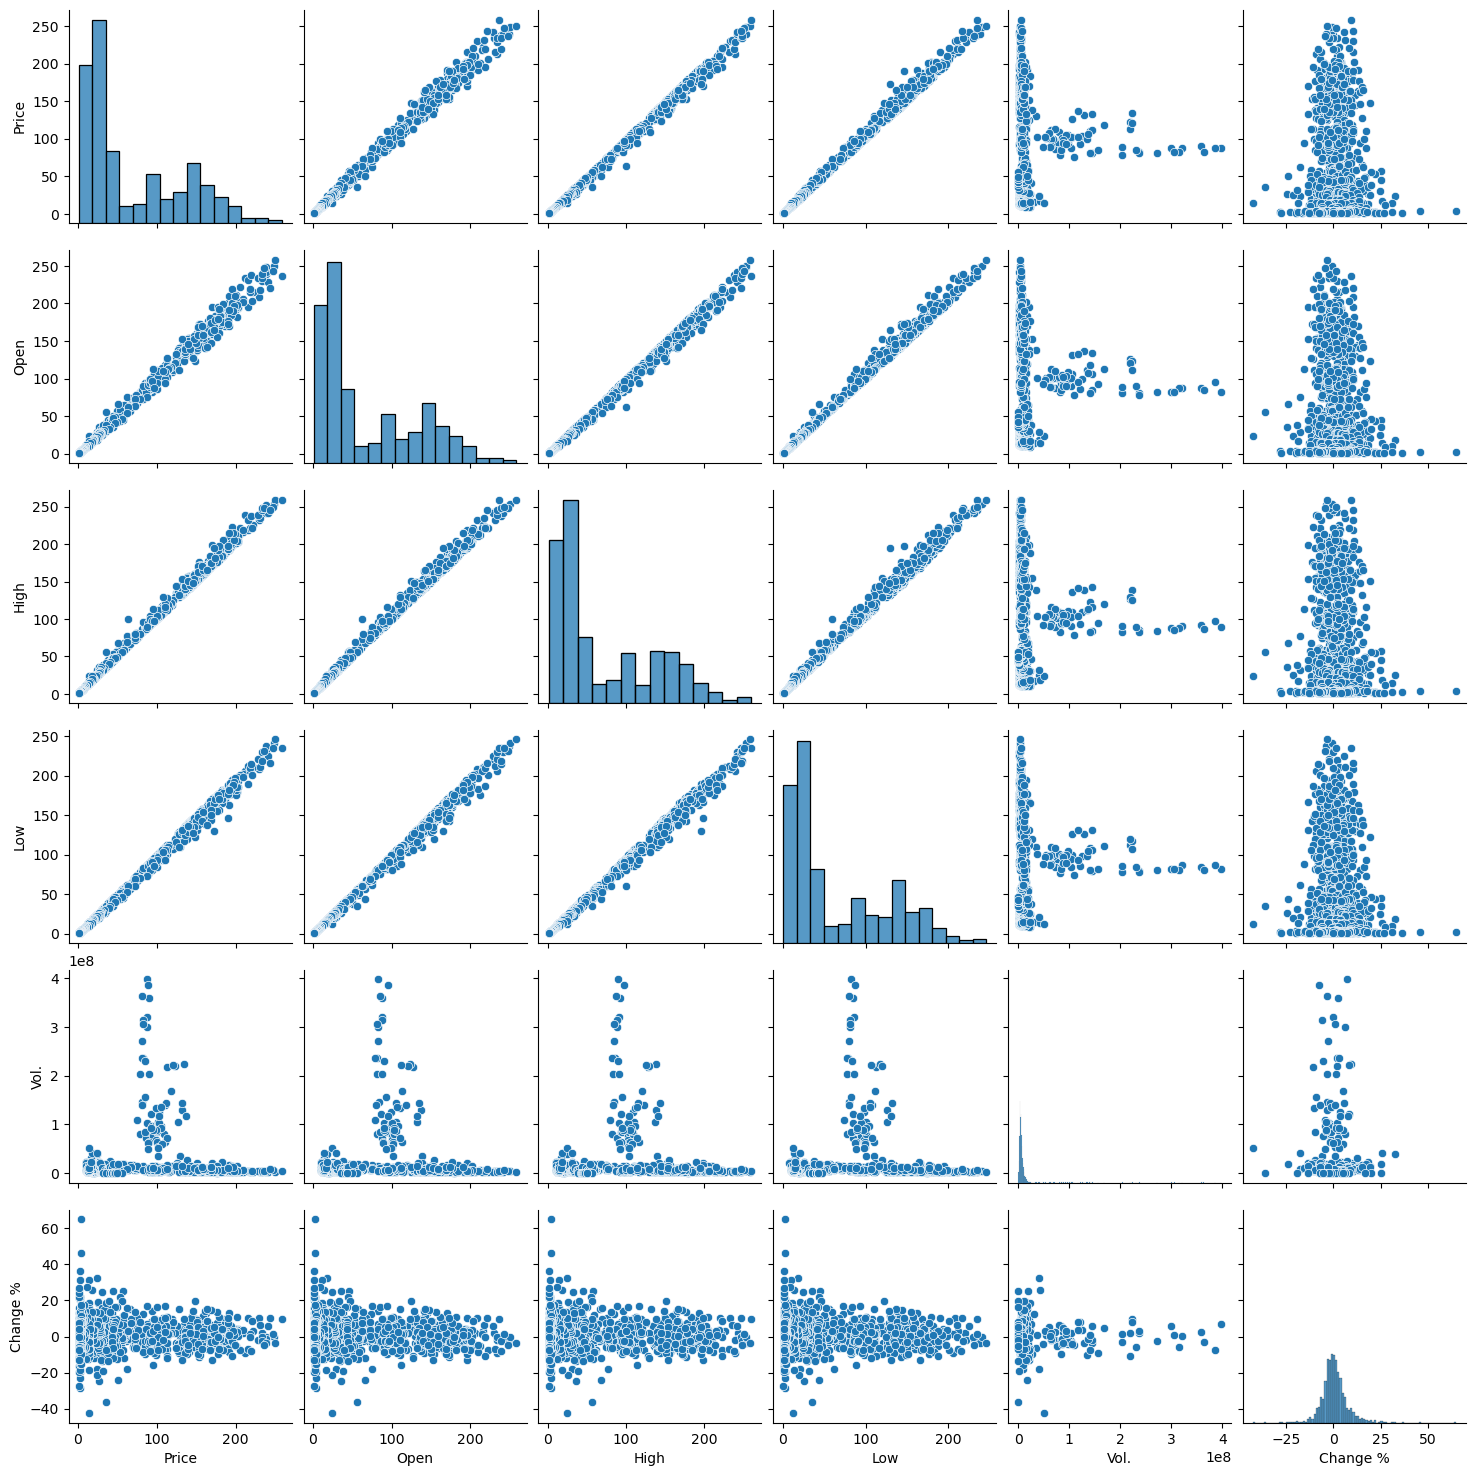

In [12]:
# Pairplot
sns.pairplot(df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']])
plt.show()


### ***Time Series Analysis***

Pada langkah ini data tanggal dikonversi ke format datetime dan diurutkan secara kronologis, ini penting agar data dapat divisualisasikan dalam urutan yang benar. Grafik harga Solana sepanjang waktu dari dataset yang dimiliki menunjukkan kenaikan signifikan ke puncak harga tertinggi yang diikuti oleh penurunan tajam dan fluktuasi di sekitar harga yang lebih rendah.

Puncak harga tinggi ini bisa mengindikasikan fase "bull run" atau masa ketertarikan pasar yang tinggi, sementara penurunan tajam setelahnya mungkin terkait dengan koreksi pasar atau penjualan besar-besaran oleh investor. Fluktiasi setelah penurunan ini menunjukkan adanya stabilisasi di level harga baru, yang mungkin merefleksikan level support yang dipertahankan oleh pasar.

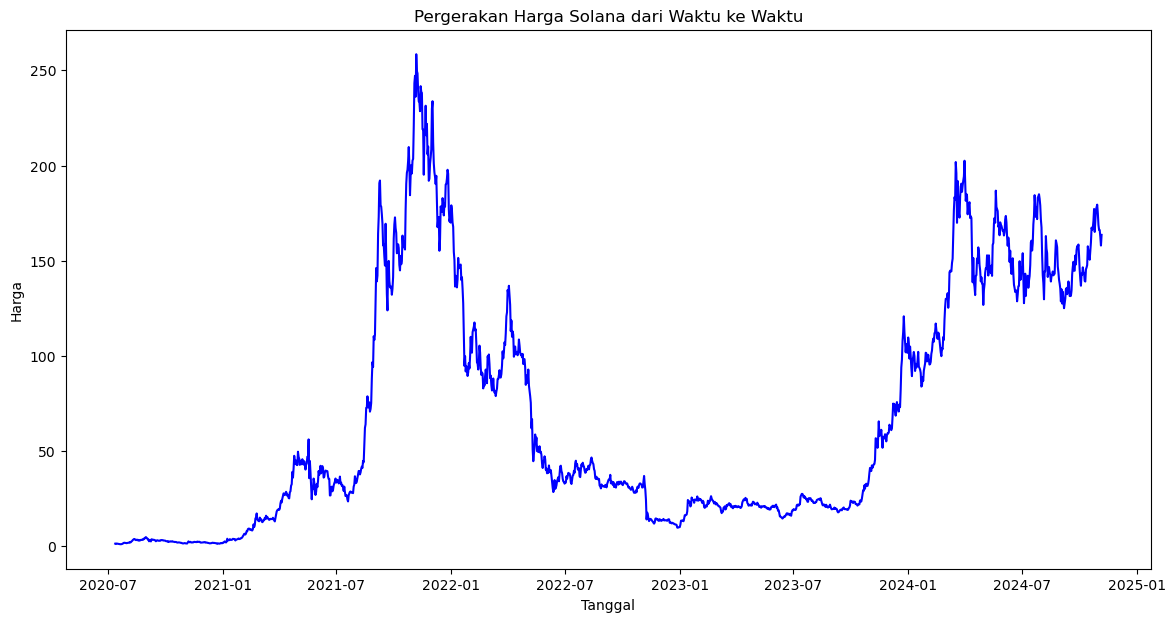

In [13]:
# Mengonversi 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Mengurutkan data berdasarkan tanggal
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Plot harga seiring waktu
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Price'], color='blue')
plt.title('Pergerakan Harga Solana dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.show()


Selanjutnya kita melakukan visualisasi menggunakan candlestick, digunakan untuk memberikan infrmasi harga pembuka, tertinggi, terendah, dan penutup setiap hari. Visualisasi ini sangat membantu dalam melihat pola-pola harian yang bisa menunjukkan apakah pasar berada dalam tren naik atau turun.

Pola candlestick ini memungkinkan kita untuk mengidentifikasi titik pembalikan, momentum harga, atau pola konsolidasi.

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Price'])])

fig.update_layout(title='Solana Price Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


Dekomposisi komponen time series, data harga dipecah menjadi `Trend`, `Seasonal`, dan `Residual`. Komponen `Trend` menunjukkan pola kangka panjang dari data harga, `Seasonal` menyoroti pola musiman atau berulang dalam periode tertentu, dan `Residual` mengungkapkan variasi yang tidak dijelaskan oleh dua komponen sebelumnya.

Trend terlihat jelas puncak tren di sekitar aktu kenaikan harga maksumum, diikuti oleh tren menurun dan kemudian stabilisasi di level yang lebih rendah, menunjukan pergerakan umum harga Solana dalam jangka panjang.

Pada pola `Seasonal` menandakan bahwa ada pola yang teratur dan konsistem dalam harga yang mungkin disebabkan oleh aktivitas pasar yang membentuk siklus. Sedangkan `Residual` adalah fluktuasi yang tidak dapat dijelaskan oleh tren atau pola musiman, yang sering kali mencerminkan kejadian yang tidak terduga atau volatilitas mendadak di pasar.

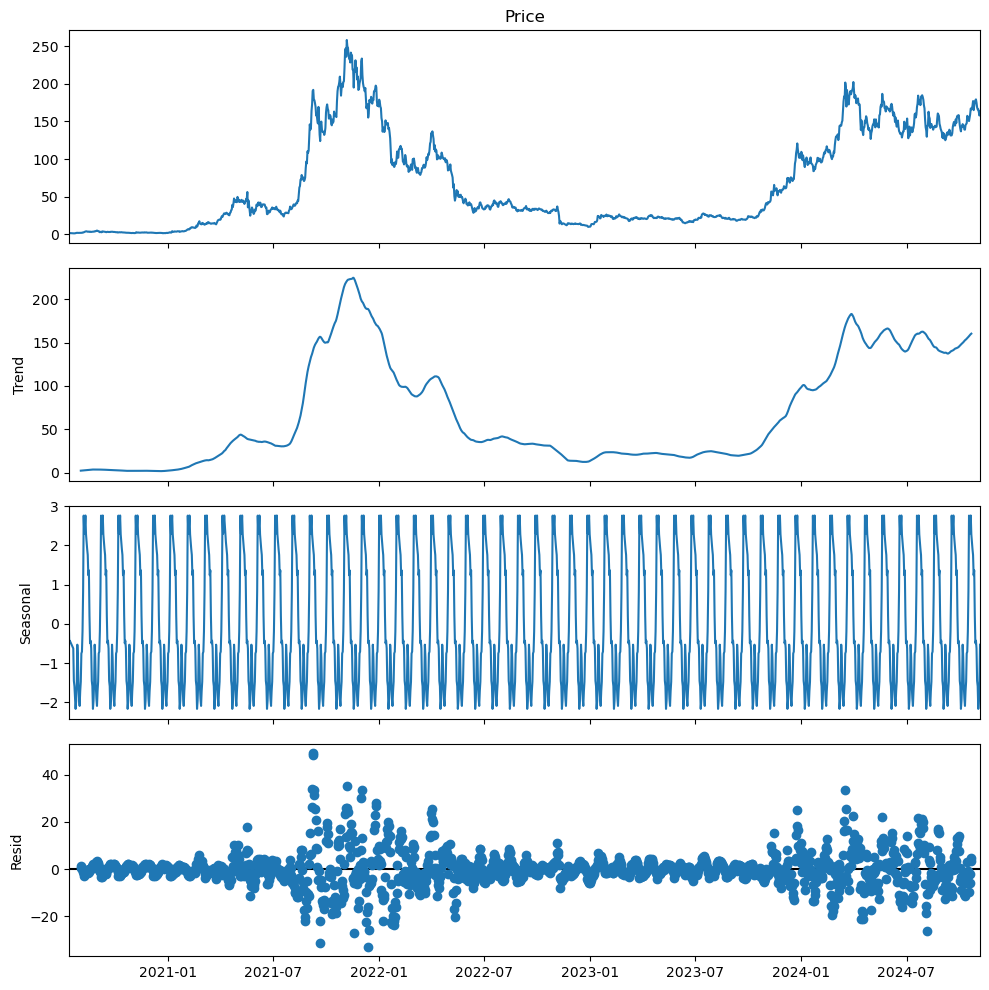

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Mengatur kolom 'Date' sebagai indeks
df_ts = df.set_index('Date')

# Melakukan dekomposisi
decomposition = seasonal_decompose(df_ts['Price'], model='additive', period=30)

# Plot hasil dekomposisi
plt.rcParams.update({'figure.figsize': (10,10)})
decomposition.plot()
plt.show()


Selanjutnya menggunakan ACF dan PACF yang memberikan informasi tentang korelasi harga saat ini dengan harga pada periode sebelumnya (lag). ACF menunjukkan bahwa ada kubungankuat antar harga untuk beberapa lag pertama, sementara PACF memperlihatkan bahwa korelasi signifikan turama pada lag awal.

Pada ACF menunjukkan orelasi yang tinggi pada lag awal menunjukkan bahwa harga saat ini masih sangat dipengaruhi oleh harga-harga sebelumnya. Ini menandakan adanya keterkaitan antar waktu yang kuat dalam data, yang bisa dimanfaatkan untuk prediksi berbasis model time series. Dan nilai PACF yang signifikan pada lag awal menunjukkan bahwa harga terpengaruh langsung oleh harga pada satu atau dua periode sebelumnya, penting untuk mempertimbangkan lag ini dalam model prediksi. 

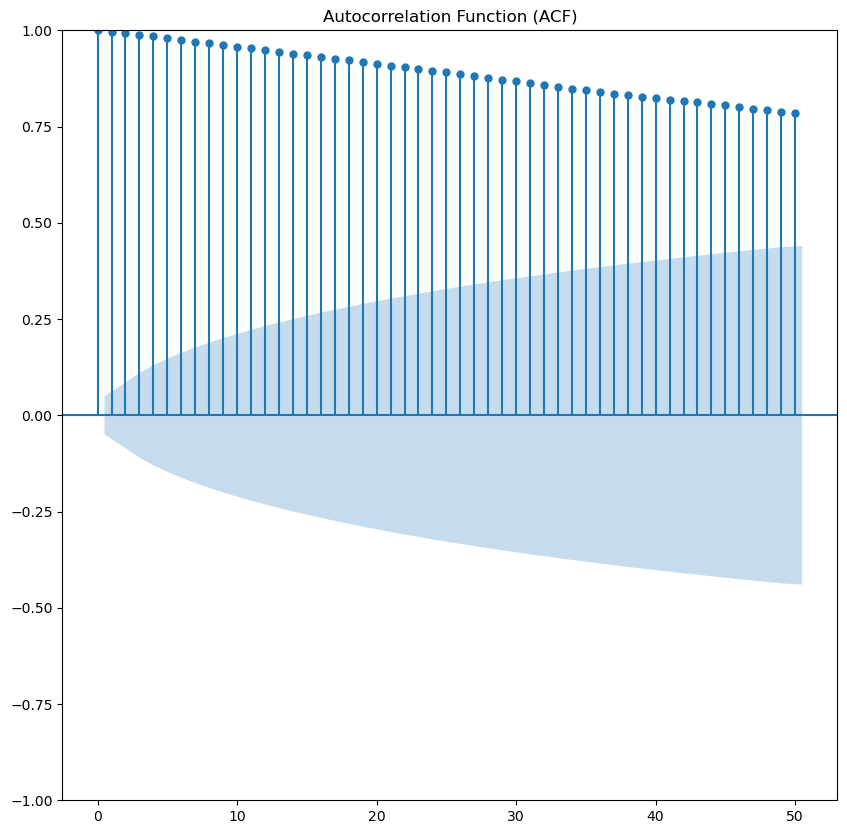

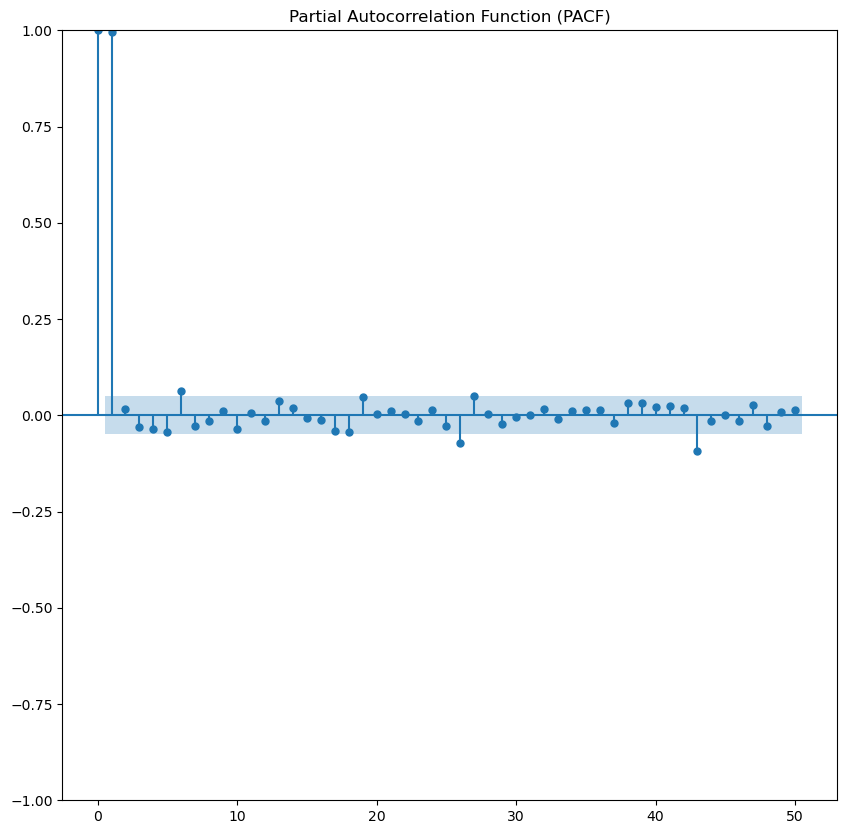

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(df_ts['Price'], lags=50)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(df_ts['Price'], lags=50, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Volatilitas dihitung sebagai standar deviasi dari return harian dalam rolling window 7 hari. Grafk ini menyoroti fluktuasi volatilitas Solana dalam dalam jangka pendek. Puncak volatilitas terlihat di beberapa periode tertentu, terutama di sekitar waktu puncak harga dan penurunan tajam berikutnya. Ini menandakan masa ketidakpastian dan pergerakan besar di pasar, sering kali terkait dengan peristiwa eksternal atau perubahan sentimen investor.

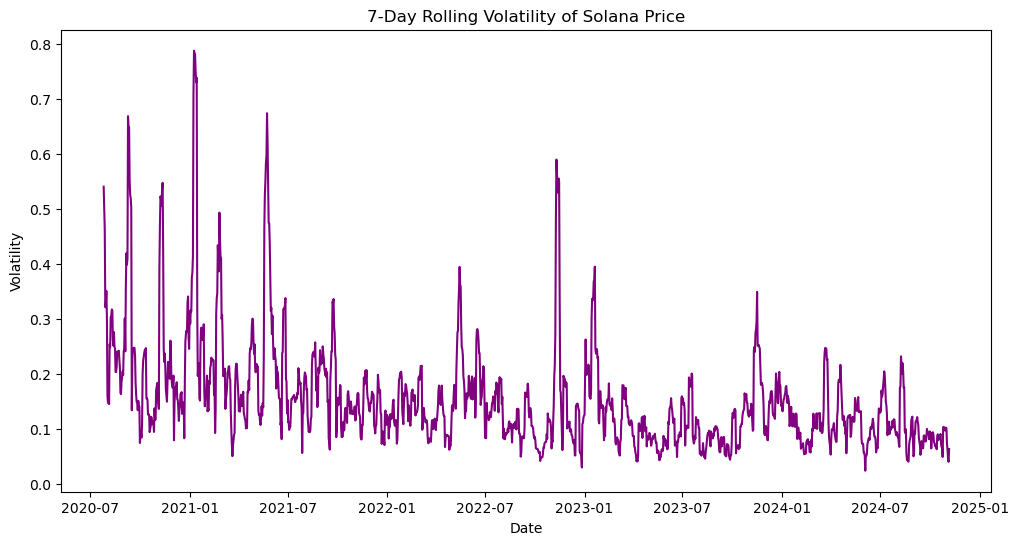

In [17]:
# Menghitung volatilitas harian (standar deviasi dari perubahan harga harian)
df['Daily Return'] = df['Price'].pct_change()
df['Volatility'] = df['Daily Return'].rolling(window=7).std() * np.sqrt(7)

# Plot volatilitas
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility'], color='purple')
plt.title('7-Day Rolling Volatility of Solana Price')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


Disini kita melakukan visualisasi volume perdagangan Solana menunjukkan jumlah perdagangan yang terjadi setiap hari. Ada beberapa lonjakan signifikan dalam volume yang tampaknya bertepatan dengan puncak harga atau periode volatilitas tinggi.

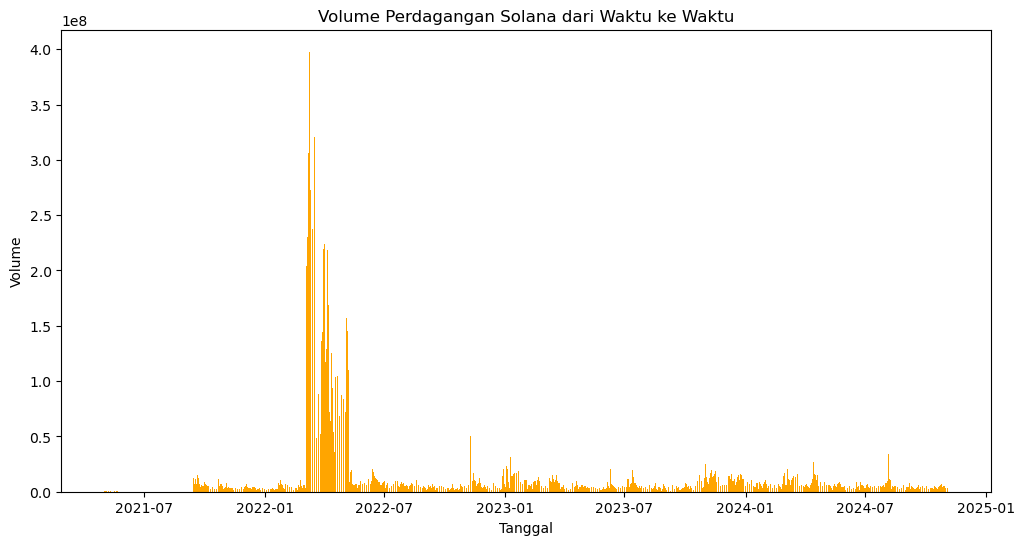

In [18]:
plt.figure(figsize=(12,6))
plt.bar(df['Date'], df['Vol.'], color='orange')
plt.title('Volume Perdagangan Solana dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Volume')
plt.show()


### ***Technical Indicators***

Pada tahap ini, kita menambahkan moving averages (MA), exponential moving average (EMA), dan moving average convergence divergence (MACD).

Grafik menunjukkan garis harga Solana bersamaan dengan MA7 dan MA21. Perpotongan antara MA7 dan MA21 memberikan sinyal perubahan tren. Ketika MA7 melintasi MA21 dari bawah ke atas, itu bisa menjadi sinyal tren naik (bullish crossover), menunjukkan potensi pembelian. Sebaliknya, ketika MA7 melintasi MA21 dari atas ke bawah, ini adalah sinyal tren turun (bearish crossover), menandakan potensi penjualan.

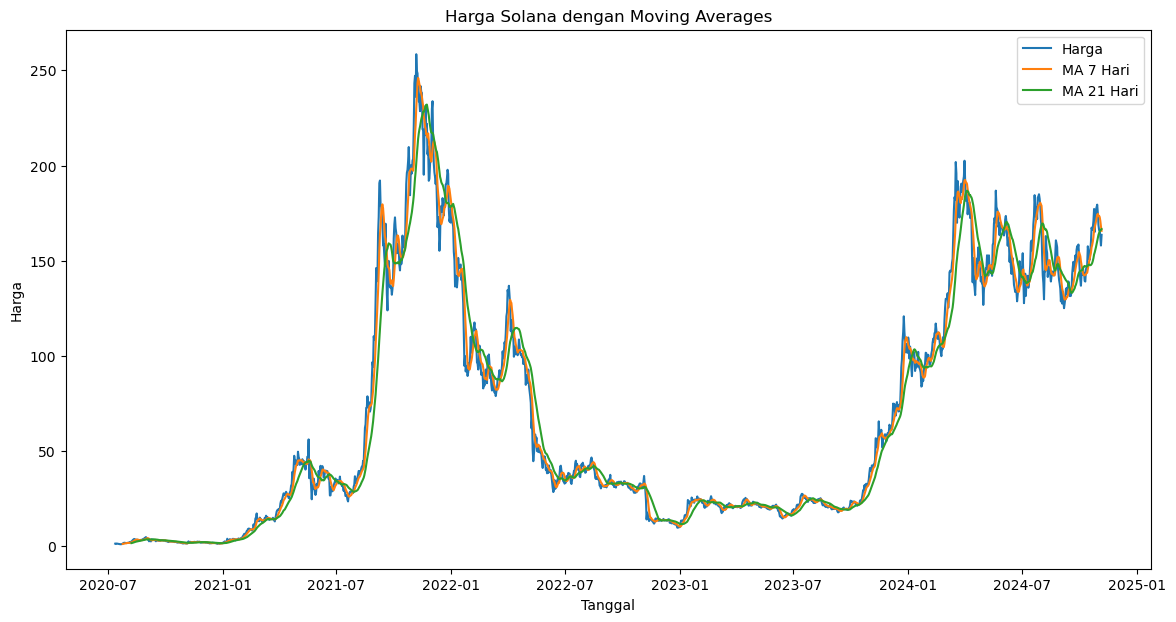

In [19]:
# Menambahkan Moving Averages
df['MA7'] = df['Price'].rolling(window=7).mean()
df['MA21'] = df['Price'].rolling(window=21).mean()

# Plot Moving Averages
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Price'], label='Harga')
plt.plot(df['Date'], df['MA7'], label='MA 7 Hari')
plt.plot(df['Date'], df['MA21'], label='MA 21 Hari')
plt.title('Harga Solana dengan Moving Averages')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()


Selanjutnya kita menghitung Exponential Moving Avarage dan Moving Average Convergence Divergence. EMA12 dan EMA26 digunakan dalam perhitungan MACD. EMA memberikan bobot lebih besar pada harga terbaru, sehingga lebih responsif terhadap perubahan harga. MACD dihitung sebagai selisih antara EMA12 dan EMA26, sedangkan garis sinyal (Signal Line) merupakan EMA dari MACD itu sendiri. 

Grafik menunjukkan pergerakan MACD dan Signal Line. Ketika MACD melintasi Signal Line dari bawah ke atas, ini menandakan sinyal beli (bullish), sedangkan ketika MACD melintasi Signal Line dari atas ke bawah, itu adalah sinyal jual (bearish). MACD juga dapat menunjukkan momentum pasar; semakin jauh MACD dari garis nol, semakin kuat momentum tersebut.

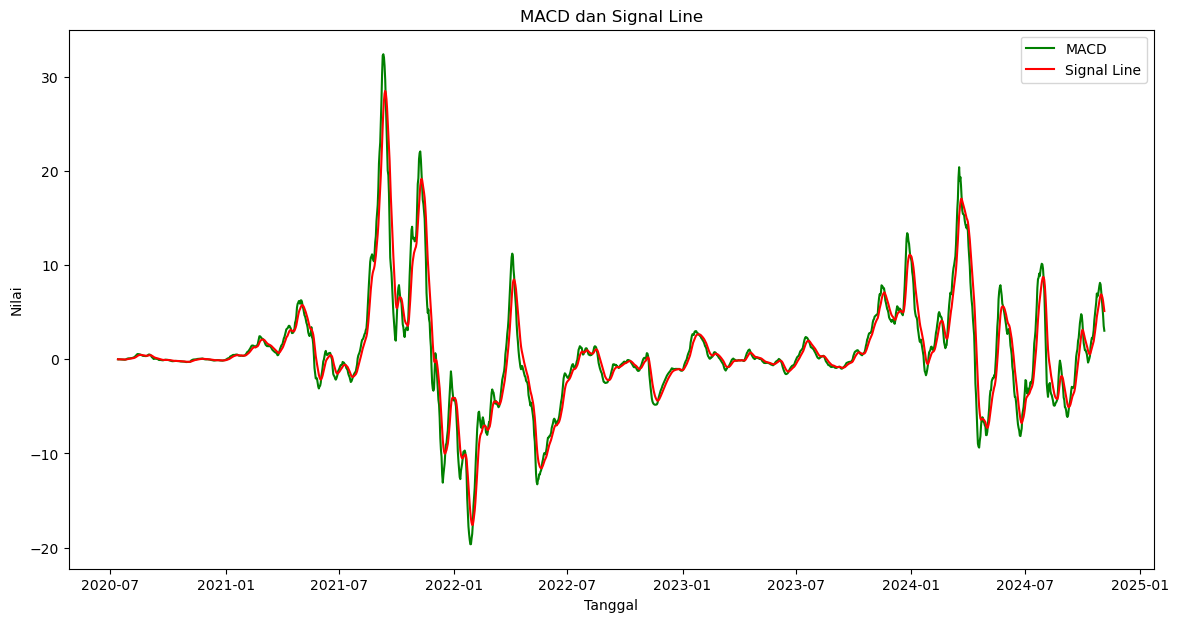

In [20]:
# Menghitung Exponential Moving Average (EMA)
df['EMA12'] = df['Price'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Price'].ewm(span=26, adjust=False).mean()

# Menghitung MACD
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['MACD'], label='MACD', color='green')
plt.plot(df['Date'], df['Signal Line'], label='Signal Line', color='red')
plt.title('MACD dan Signal Line')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()


Visualisasi Boxplot menunjukkan distribusi harga Solana setiap bulan sepanjang tahun, dengan indikator nilai minimum, maksimum, median, serta adanya outlier.

Bulan-bulan seperti November menunjukkan rentang harga yang lebih luas dan median yang lebih tinggi, mengindikasikan adanya volatilitas yang tinggi. Sementara bulan lain, seperti Juli dan Juni, menunjukkan harga yang lebih stabil dengan rentang yang lebih sempit. Outlier yang muncul pada beberapa bulan menandakan adanya fluktuasi harga yang ekstrim dalam waktu singkat, sering kali disebabkan oleh peristiwa eksternal atau peningkatan volume perdagangan mendadak.

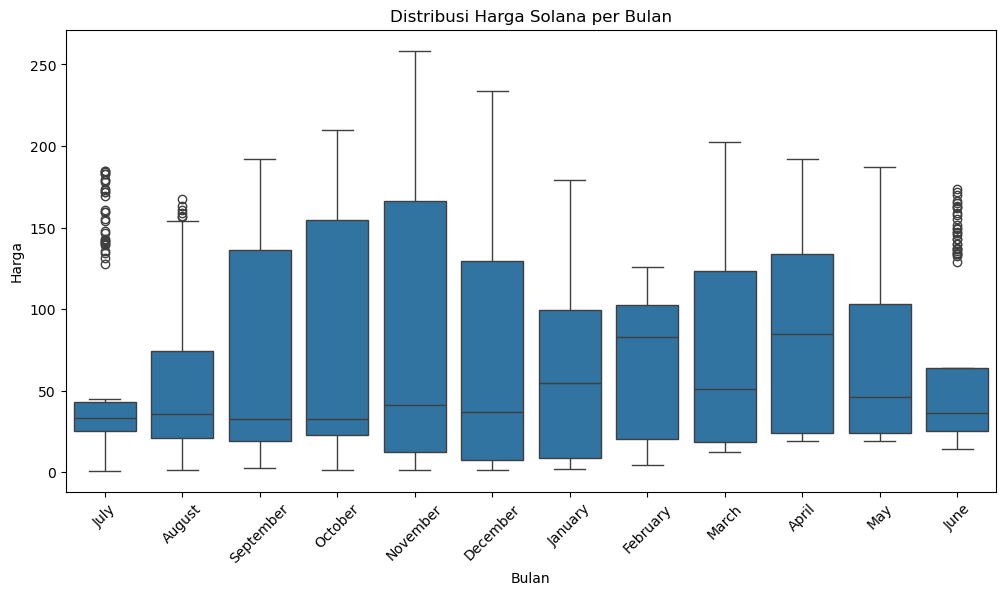

In [21]:
# Menambahkan kolom Bulan
df['Month'] = df['Date'].dt.month_name()

# Boxplot harga per bulan
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Price', data=df)
plt.title('Distribusi Harga Solana per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.show()


## ***Data Preprocessing***

### ***Handling Missing Value***

Langkah pertama dalam menangani missing values pada kolom Vol. adalah dengan menghitung median dari kolom tersebut. Median dipilih karena lebih stabil terhadap outlier dibandingkan rata-rata (mean), sehingga memberikan estimasi yang lebih andal dalam data perdagangan yang bisa sangat fluktuatif.

Setelah menghitung median, kita menggunakan nilai tersebut untuk menggantikan missing values pada kolom Vol.. Proses ini memastikan bahwa data lengkap dan tidak ada nilai yang hilang, sehingga analisis selanjutnya tidak terganggu.

In [22]:
# Menghitung median dari kolom 'Vol.' yang sudah dalam bentuk numerik
median_vol = df['Vol.'].median()

# Mengimputasi missing values dengan median
df['Vol.'].fillna(median_vol, inplace=True)

# 3. Memastikan Tidak Ada Missing Values pada Kolom 'Vol.'
print("Jumlah missing values pada 'Vol.':", df['Vol.'].isnull().sum())

Jumlah missing values pada 'Vol.': 0


In [23]:
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %,Daily Return,Volatility,MA7,MA21,EMA12,EMA26,MACD,Signal Line,Month
0,2020-07-13,1.279,1.009,1.279,1.009,5290000.0,26.71,NaN,NaN,NaN,NaN,1.279000,1.279000,0.000000,0.000000,July
1,2020-07-14,1.115,1.279,1.279,1.114,5290000.0,-12.78,-0.128225,NaN,NaN,NaN,1.253769,1.266852,-0.013083,-0.002617,July
2,2020-07-15,1.383,1.115,1.384,1.115,5290000.0,24.00,0.240359,NaN,NaN,NaN,1.273651,1.275455,-0.001805,-0.002454,July
3,2020-07-21,1.004,0.874,1.005,0.874,5290000.0,-27.41,-0.274042,NaN,NaN,NaN,1.232166,1.255348,-0.023181,-0.006600,July
4,2020-07-22,1.046,1.004,1.087,1.003,5290000.0,4.17,0.041833,NaN,NaN,NaN,1.203525,1.239840,-0.036315,-0.012543,July
5,2020-07-23,1.044,1.046,1.087,1.005,5290000.0,-0.14,-0.001912,NaN,NaN,NaN,1.178983,1.225334,-0.046351,-0.019304,July
6,2020-07-25,1.274,0.986,1.379,0.986,5290000.0,22.02,0.220307,NaN,1.163571,NaN,1.193601,1.228939,-0.035338,-0.022511,July
7,2020-07-26,1.610,1.274,1.610,1.249,5290000.0,26.34,0.263736,0.540528,1.210857,NaN,1.257662,1.257165,0.000497,-0.017909,July
8,2020-07-27,1.731,1.610,2.067,1.610,5290000.0,7.49,0.075155,0.498136,1.298857,NaN,1.330483,1.292264,0.038219,-0.006684,July
9,2020-07-28,1.787,1.731,1.821,1.630,5290000.0,3.24,0.032351,0.462551,1.356571,NaN,1.400717,1.328911,0.071805,0.009014,July


### ***Feature Extraction***

Untuk melakukan analisis time series, kolom Date dikonversi ke dalam format datetime. Ini memungkinkan kita untuk memanfaatkan fungsi-fungsi analisis waktu pada tahap selanjutnya.

In [24]:
# Mengonversi 'Date' dengan format '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

Setelah konversi, data diurutkan berdasarkan tanggal untuk memastikan urutan kronologis yang benar. Mengonversi dan mengurutkan data berdasarkan tanggal memberikan alur kronologis yang jelas, yang sangat penting dalam analisis time series. Ini memungkinkan kita untuk menganalisis data harga dari waktu ke waktu dengan lebih akurat.

In [25]:
# Urutkan data berdasarkan tanggal
df.sort_values('Date', inplace=True)

# Reset indeks
df.reset_index(drop=True, inplace=True)

In [26]:
# Tampilkan tipe data dan beberapa nilai setelah konversi
print(df['Date'].dtypes)
print(df['Date'].head(10))

datetime64[ns]
0   2020-07-13
1   2020-07-14
2   2020-07-15
3   2020-07-21
4   2020-07-22
5   2020-07-23
6   2020-07-25
7   2020-07-26
8   2020-07-27
9   2020-07-28
Name: Date, dtype: datetime64[ns]


Selanjutnya menambahkan Moving Averages, Daily Return, dan Date as Ordinal. Moving average ini berguna untuk menghaluskan fluktuasi jangka pendek dan membantu dalam melihat tren jangka panjang dan menengah dalam pergerakan harga. Daily return dihitung sebagai persentase perubahan harga harian. Ini adalah metrik penting yang menunjukkan volatilitas harian dan potensi keuntungan atau kerugian dalam jangka pendek. Untuk keperluan pemodelan regresi dan LSTM, kolom Date dikonversi ke bentuk ordinal, yang menyajikan tanggal dalam format numerik. Hal ini diperlukan karena model tidak dapat bekerja langsung dengan data dalam format datetime.

In [27]:
# Add Moving Averages
df['MA7'] = df['Price'].rolling(window=7).mean()
df['MA21'] = df['Price'].rolling(window=21).mean()

# Add Daily Return
df['Daily Return'] = df['Price'].pct_change()

# Add Date as ordinal
df['Date_ordinal'] = df['Date'].map(datetime.toordinal)

### ***Split Data***

Pada tahap ini kita melakukan split data dan melakukan normalisasi data pada kolom Price. Data dipecah menjadi bagian pelatihan dan pengujian dengan proporsi 80:20, selanjutnya melakukan normalisasi data menggunakan MinMaxScaler dengan rentang 0 hingga 1 untuk digunakan pada model LSTM.

In [28]:
training_data_len = int(len(df) * 0.8)

data = df.filter(['Price'])
dataset = data.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

Setelah melakukan split data untuk model LSTM, kita lanjut melakukan split data untuk model regresi linear

In [29]:
X_lr = df[['Date_ordinal']]
y_lr = df['Price']

X_train_lr = X_lr[:training_data_len]
X_test_lr = X_lr[training_data_len:]
y_train_lr = y_lr[:training_data_len]
y_test_lr = y_lr[training_data_len:]

## ***Modeling***

### ***Linear Regression***

Pada tahap ini model regresi linear dilatih menggunakan data pelatihan dan mencoba untuk menemukan hubungan linear antara fitur(tanggal ordinal) dan target variabel(harga)

In [33]:
# Create Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Predict
y_pred_lr = lr_model.predict(X_test_lr)

Regresi linier menawarkan pendekatan sederhana dalam memprediksi harga, dengan mengasumsikan bahwa harga memiliki pola tren linier. Namun, karena pasar cryptocurrency terkenal dengan volatilitasnya, metode ini mungkin memiliki keterbatasan dalam menangkap fluktuasi yang lebih kompleks.

### ***LSTM***

Setelah membuat model regresi linear, kita akan membuat model LSTM, alasan dipilihnya karena kemampuannya dalam menangani data time series dan mengenali pola temporal jangka panjang. LSTM mampu menangkap hubungan non-linear dalam data yang tidak bisa ditangkap oleh model linear sederhana, menjadikannya lebih cocok untuk memprediksi harga yang sangat volatil seperti Solana.

Selanjutnya kita menentukan Window size, disini kita ditetapkan menjadi 60, yang artinya model akan menggunakan 60 data sebelumnya untuk memprediksi harga berikutnya. Pemilihan window size yang tepat sangat penting karena memengaruhi konteks data yang dilihat oleh model.

In [34]:
window_size = 60

Fungsi `create_dataset` dibuat untuk membentuk dataset yang akan diproses oleh LSTM. Dataset ini terdiri dari sekuens data dengan panjang window size sebagai input dan harga aktual berikutnya sebagai output. Fungsi ini memungkinkan data time series diubah menjadi format yang dapat dimengerti oleh LSTM, di mana setiap titik prediksi bergantung pada urutan data sebelumnya.

In [35]:
def create_dataset(dataset, window_size):
    X = []
    y = []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i - window_size:i, 0])  # Input sequence
        y.append(dataset[i, 0])  # Output value
    return np.array(X), np.array(y)

Setelah membuat fungsi `create_dataset`, selanjutnya kita menyiapkan data test dan data train yang dibentuk dengan memeprtimbangkan window size, untu memastikan setiap sekuens memiliki panjang yang sama untuk diproses oleh model LSTM.

In [36]:
# Menyiapkan data untuk model LSTM
train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - window_size:, :]

#Membentuk Dataset Training dan Testing
X_train_lstm, y_train_lstm = create_dataset(train_data, window_size)
X_test_lstm, y_test_lstm = create_dataset(test_data, window_size)


Data kemudian diubah bentuknya agar sesuai dengan input LSTM, proses reshape ini diperlukan karena LSTM memerlukan format data tiga dimensi untuk emproses data berurutan. Dengan mengubah bentuk data menjadi tiga dimensi, kita memastikan bahwa model LSTM menerima input dalam format yang benar dan dapat memproses sekuens harga dengan benar, menjadikannya lebih responsif terhadap tren dan pola waktu.

In [42]:
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))


Setelah proses pengubahhan data, kita lanjutkan untuk membuat model LSTM yang disertai lapisan dropout untuk mencegah overfitting. Model kemudian dilatih menggunakan optimizer `adam` dan fungsi los `mean_squared_error` selama 50 epoch.

In [45]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dropout(0.2))  
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))  
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/50
38/38 [==============================] - 3s 35ms/step - loss: 0.0063 - val_loss: 0.0025
Epoch 2/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 5/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 7/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 8/50
38/38 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 9/50
38/38 [==============================] - 1s 19ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 10/50
38/38 [==============================] - 1s 21ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11/

kita mencoba berbagai konfigurasi jumlah neuron dan lapisan untuk menemukan arsitektur yang memberikan hasil terbaik. Untuk mencegah overfitting, dropout rate sebesar 20% ditambahkan setelah setiap lapisan LSTM.


## ***Evaluations***

Setelah melatih model, tentunya kita harus melakukan evaluasi pada model yang telah kita buat. Kita mulai dengan mengevaluasi regresi linear menggunakan dua metrik yaitu `Mean Absolute Error (MAE)` dan `Root Mean Squared Error (RMSE)`. MAE menghitung rata-rata dari kesalahan absolut antara nilai prediksi dan nilai aktual, yang memberi kita ukuran rata-rata kesalahan tanpa mempertimbangkan arah kesalahan. Di sisi lain, RMSE memberikan gambaran lebih sensitif terhadap kesalahan yang lebih besar, karena setiap selisih dipangkatkan dua, memperbesar dampak dari outlier.

Hasil evaluasi dari model regresi linear yaitu MAE sebesar 96.35 mengindikasikan bahwa rata-rata prediksi model menyimpang sekitar 96.34 unit dari nilai aktual, dan RMSE sebesar 100.02 menandakan ada beberapa kesalahan prediksi yang cukup besar, menunjukkan model regresi linear mungkin tidak ideal untuk data yang sangat volatil seperti harga crypto.

In [39]:
# Evaluate Linear Regression model
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))

print('Linear Regression MAE:', mae_lr)
print('Linear Regression RMSE:', rmse_lr)

Linear Regression MAE: 96.33515759814426
Linear Regression RMSE: 100.02367955459133


Selanjutnya, kita beralih ke model LSTM dan menggunakan metrik evaluasi yang sama untuk melihat performanya. Pada model LSTM, data prediksi dan nilai aktual harus di-inverse-transform karena data telah dinormalisasi sebelumnya. Setelah inversi, kita dapat menghitung MAE dan RMSE pada skala asli untuk membandingkan kinerja LSTM dengan Linear Regression secara langsung.

Hasil dari evaluasi model LSTM yaitu MAE  sebesar 4.987 menunjukkan bahwa model LSTM memiliki rata-rata kesalahan yang jauh lebih kecil dibandingkan Linear Regression, yang berarti prediksinya lebih mendekati harga aktual. Pada RMSE sebesar 6.456 memperlihatkan bahwa LSTM mampu mengatasi fluktuasi data kripto dengan lebih baik, meskipun masih terdapat beberapa outlier atau fluktuasi yang sulit diprediksi. 

In [46]:
# Predict using LSTM model
predictions_lstm = lstm_model.predict(X_test_lstm)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Get actual values
y_test_lstm_actual = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

# Evaluate LSTM model
mae_lstm = mean_absolute_error(y_test_lstm_actual, predictions_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_actual, predictions_lstm))

print('LSTM MAE:', mae_lstm)
print('LSTM RMSE:', rmse_lstm)


10/10 [==============================] - 1s 12ms/step
LSTM MAE: 4.987166164519681
LSTM RMSE: 6.456942636757551


Dengan hasil MAE dan RMSE yang lebih kecil, jelas bahwa LSTM bekerja lebih efektif dibandingkan Linear Regression dalam menangkap pola waktu dari harga kripto yang volatil. Ini disebabkan oleh kemampuan LSTM untuk belajar dari pola sekuensial jangka panjang, yang sangat penting dalam analisis time series.

Selanjutnya kita coba visualisasikan grafik loss training dan validation selama proses pelatihan LSTM, ini memberikan wawasan tentang performa model seiring waktu. Di awal pelatihan, nilai loss sangat tinggi, namun seiring bertambahnya epoch, nilai loss menurun dan mencapai stabilitas. Ini menunjukkan bahwa model berhasil belajar dari data tanpa terlalu banyak overfitting pada data training, yang dapat diamati dari jarak yang relatif konsisten antara training dan validation loss.

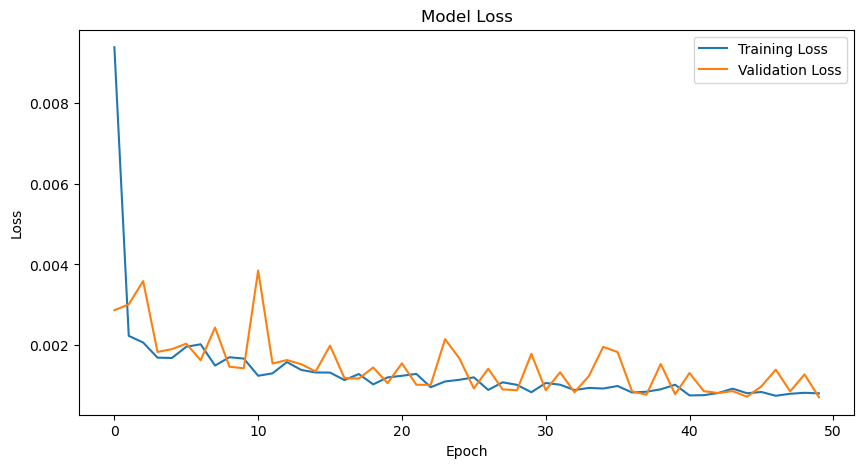

In [57]:
# Plot training & validation loss values
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Pada langkah ini, model LSTM yang telah kita latih digunakan untuk membuat prediksi pada data uji (`X_test_lstm`). Karena data input telah dinormalisasi selama preprocessing, hasil prediksi juga berada dalam skala yang sama. Oleh karena itu, dilakukan inversi skala menggunakan scaler.inverse_transform agar hasil prediksi kembali ke skala asli, sehingga dapat dibandingkan langsung dengan data harga aktual.

In [58]:
predictions_lstm = lstm_model.predict(X_test_lstm)

# Inversi skala untuk prediksi dan data uji
predictions_lstm = scaler.inverse_transform(predictions_lstm)
y_test_lstm_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

10/10 [==============================] - 0s 12ms/step


Tahap akhir adalah memvisualisasikan hasil repdiksi dan membandingkannya dengan harga aktual dalam rentang waktu yang sama, pada grafiik ini garis biru menunjukkan harga aktual dari Solana, sedangkan garis merah menunjukkan harga prediksi yang dihasilkan oleh model LSTM.

Grafik ini menunjukkan bahwa prediksi dari model LSTM mengikuti tren harga aktual dengan cukup baik, meskipun ada beberapa fluktuasi yang tidak dapat sepenuhnya diprediksi oleh model. Dekatnya pergerakan antara garis merah dan biru mengindikasikan bahwa model LSTM mampu menangkap pola harga Solana dalam rentang waktu yang diuji.

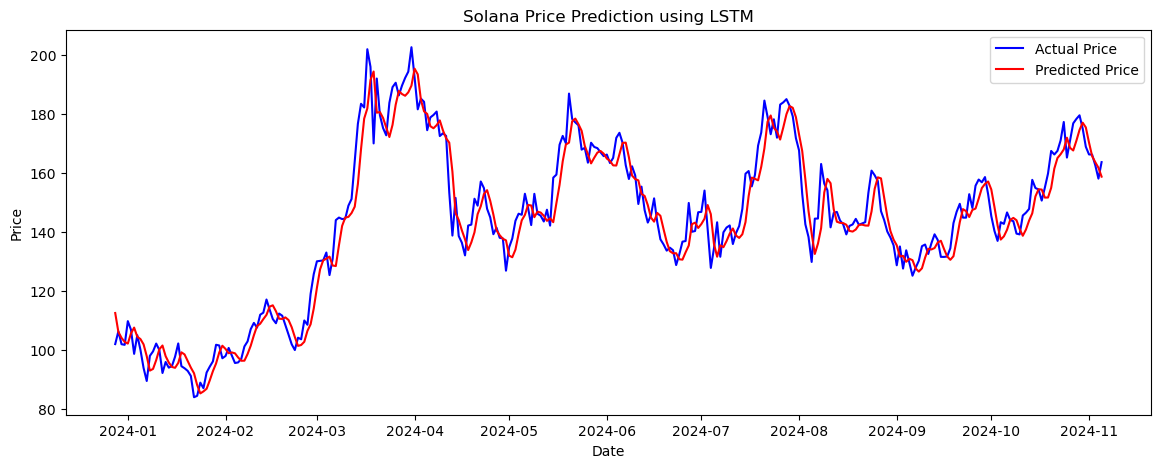

In [59]:
# 8. Plotting Hasil Prediksi vs Aktual
# Mengambil tanggal sesuai panjang data uji
dates = df['Date'][-len(y_test_lstm_actual):].reset_index(drop=True)

# Plot hasil prediksi vs nilai aktual
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(dates, y_test_lstm_actual, color='blue', label='Actual Price')
plt.plot(dates, predictions_lstm, color='red', label='Predicted Price')
plt.title('Solana Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Model berhasil memprediksi sebagian besar pergerakan harga, baik ketika harga meningkat maupun menurun. Namun, beberapa deviasi yang terlihat dapat diatribusikan pada volatilitas alami pasar kripto yang sulit diprediksi secara presisi. Hal ini menunjukkan bahwa model LSTM lebih cocok untuk perkiraan tren dan pola umum, ketimbang prediksi harga absolut.

Secara keseluruhan, proses prediksi ini menunjukkan bahwa model LSTM mampu mengatasi kompleksitas data time series pada harga kripto seperti Solana. Dengan evaluasi yang menunjukkan kesalahan prediksi yang relatif rendah (MAE dan RMSE), serta visualisasi yang menunjukkan kecocokan antara prediksi dan data aktual, LSTM terbukti lebih efektif dibanding model linear sederhana untuk data yang sifatnya sekuensial dan volatil.